In [42]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.06630924 0.13929869 0.13857591 ... 0.00339921 0.04474129 0.1034172 ]
 [0.05581317 0.11724913 0.11664076 ... 0.00286115 0.0376592  0.08704731]
 [0.34169325 0.71780974 0.71408527 ... 0.0175162  0.230553   0.53291149]
 ...
 [0.3053883  0.64154237 0.63821362 ... 0.0156551  0.20605672 0.47628958]
 [0.16833374 0.35362594 0.3517911  ... 0.00862928 0.11358096 0.2625366 ]
 [0.08833202 0.18556289 0.18460007 ... 0.00452816 0.05960086 0.13776436]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.22462737  0.2895549   0.06617258 ...  0.09386753  0.0340085
  -0.0198876 ]
 [ 0.10248109 -0.0572472  -0.06709474 ...  0.09564579 -0.16570211
   0.23333823]
 [ 0.40139189  0.69043584  0.83781635 ... -0.01881658  0.35135822
   0.52998268]
 ...
 [-0.00248462  0.57411114  0.63589366 ...  0.0338505   0.19048981
   0.55330906]
 [ 0.23173196  0.29969153  0.20725277 ... -0.1658712   0.04433566
   0.24077743]
 [ 0.08505622  0.09407125  0.18432175 ... -0.06167947  0.10921226
   0.144

In [43]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [44]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [45]:
K = np.min([K, U.shape[1]])
print(K)

5


In [46]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[ 0.11211445 -0.29581568 -0.222827    0.17237106 -0.00206679 -0.14218946
 -0.39895204  0.1914428   0.04657299 -0.14686866  0.04807397  0.4558141
  0.10903386  0.08666139 -0.09706776 -0.21024638  0.00213796 -0.02423978
  0.01520824  0.10232336  0.07729211  0.25831205 -0.27800384  0.12094762
 -0.02038554 -0.06608095 -0.15989129 -0.23994245 -0.01950253 -0.25987035
 -0.19137418  0.13969922  0.08158859  0.00432358  0.35910416 -0.16925173
  0.10435792  0.02370118 -0.11237855  0.2873328  -0.00813048 -0.05451101
  0.17595786  0.20798437 -0.13822582  0.20345148  0.3084585   0.07188087
 -0.02046891 -0.03939783]
[ 0.01043074  0.28932962 -0.2647319   0.00133587 -0.04274113  0.47624615
  0.00291017  0.02482973 -0.01201103  0.31086233  0.2530577  -0.06189504
 -0.11430057 -0.11993269 -0.03902492  0.01900556  0.11351932 -0.04247492
 -0.14847128  0.211243   -0.00392994  0.06918636 -0.17749384 -0.18352085
  0.01797576 -0.21637227  0.12515819  0.22717063  0.00669544  0.11871946
  0.05244776  0.17625122  

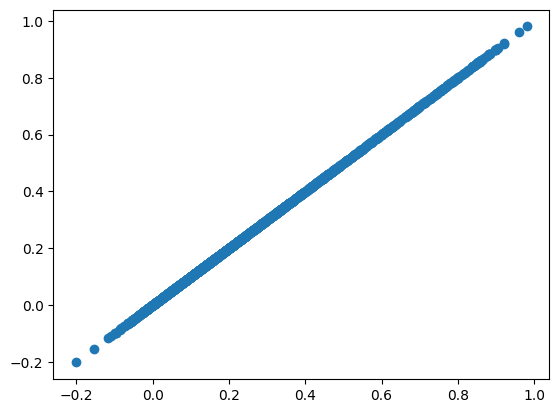

In [47]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

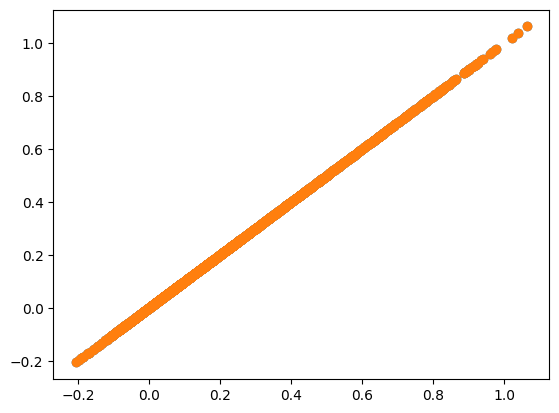

In [48]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [49]:
mycebmf.update_tau()
mycebmf.tau

array([[148.18358, 148.18358, 148.18358, ..., 148.18358, 148.18358,
        148.18358],
       [148.18358, 148.18358, 148.18358, ..., 148.18358, 148.18358,
        148.18358],
       [148.18358, 148.18358, 148.18358, ..., 148.18358, 148.18358,
        148.18358],
       ...,
       [148.18358, 148.18358, 148.18358, ..., 148.18358, 148.18358,
        148.18358],
       [148.18358, 148.18358, 148.18358, ..., 148.18358, 148.18358,
        148.18358],
       [148.18358, 148.18358, 148.18358, ..., 148.18358, 148.18358,
        148.18358]], shape=(50, 40), dtype=float32)

In [50]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_norm at 0x000001B280BD1FC0>


In [51]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([0.4950127 , 1.1289347 , 1.1231673 , 0.12432834, 1.2156069 ,
        0.56693053, 1.2274642 , 0.71551573, 0.31202912, 0.2874467 ,
        0.5899008 , 1.387133  , 0.30429882, 1.1089548 , 0.8960244 ,
        0.97612566, 1.4192472 , 0.30470192, 1.2269878 , 0.03122537,
        0.31341192, 0.43253583, 0.87767076, 0.70107293, 0.8406935 ,
        1.1943554 , 1.4973537 , 0.15670867, 0.65420663, 1.4433776 ,
        0.33634216, 0.5323436 , 0.32441437, 1.4507174 , 1.1625535 ,
        0.49726906, 0.2531602 , 0.05401944, 0.3877355 , 0.8945253 ],
       dtype=float32),
 array([0.03030616, 0.03030616, 0.03030616, 0.03030616, 0.03030616,
        0.03030616, 0.03030616, 0.03030616, 0.03030616, 0.03030616,
        0.03030616, 0.03030616, 0.03030616, 0.03030616, 0.03030616,
        0.03030616, 0.03030616, 0.03030616, 0.03030616, 0.03030616,
        0.03030616, 0.03030616, 0.03030616, 0.03030616, 0.03030616,
        0.03030616, 0.03030616, 0.03030616, 0.03030616, 0.03030616,
        0.03030616, 0.03

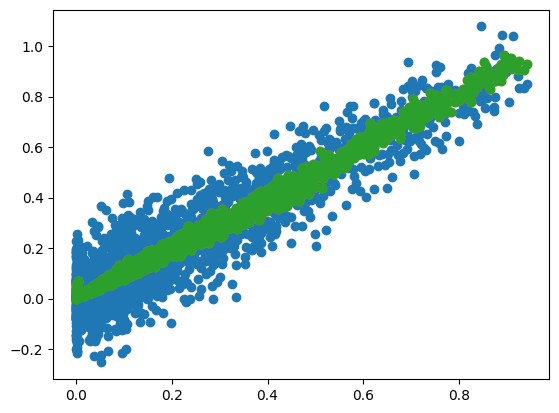

In [52]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


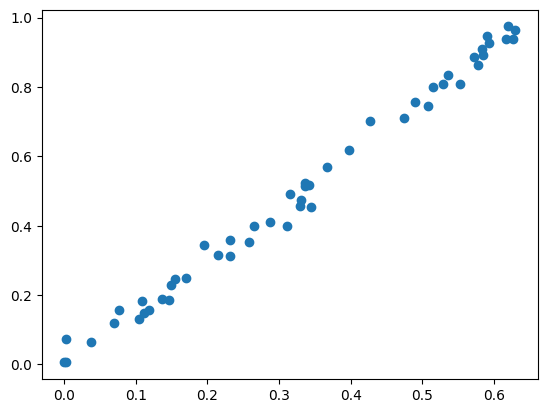

In [53]:
plt.scatter(mycebmf.L[:,0], u)

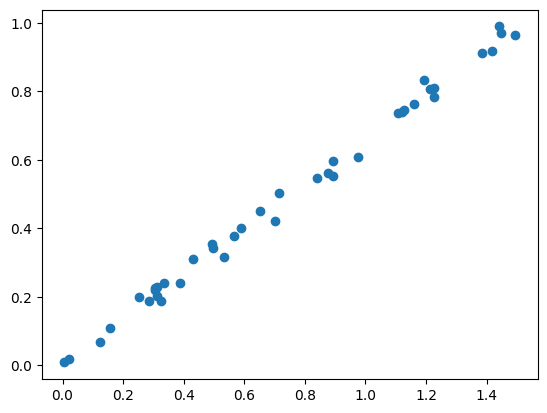

In [54]:
plt.scatter(mycebmf.F[:,0], v)

In [55]:
mycebmf.L[:,1]

array([ 1.1738815e-09, -3.2643142e-09, -2.3748992e-09,  1.8215541e-09,
       -1.0226382e-11, -1.4882895e-09, -4.7078186e-09,  2.0397841e-09,
        4.8527937e-10, -1.5434340e-09,  5.0117627e-10,  5.7707377e-09,
        1.1506555e-09,  9.0946384e-10, -1.0007759e-09, -2.2342508e-09,
        3.2416164e-11, -2.4005131e-10,  1.6898698e-10,  1.0775302e-09,
        8.0913071e-10,  2.8162594e-09, -3.0302667e-09,  1.2751945e-09,
       -1.9945920e-10, -6.8660139e-10, -1.6805041e-09, -2.5860927e-09,
       -1.9581491e-10, -2.8143790e-09, -2.0222797e-09,  1.4682553e-09,
        8.5732532e-10,  4.9757122e-11,  4.1274957e-09, -1.7840829e-09,
        1.0919051e-09,  2.5165639e-10, -1.1694645e-09,  3.1721705e-09,
       -8.2907674e-11, -5.5943411e-10,  1.8650059e-09,  2.2219528e-09,
       -1.4439346e-09,  2.1747681e-09,  3.4306198e-09,  7.5849604e-10,
       -2.0580999e-10, -4.0539525e-10], dtype=float32)

In [60]:
for i in range(40):
    mycebmf.iter()

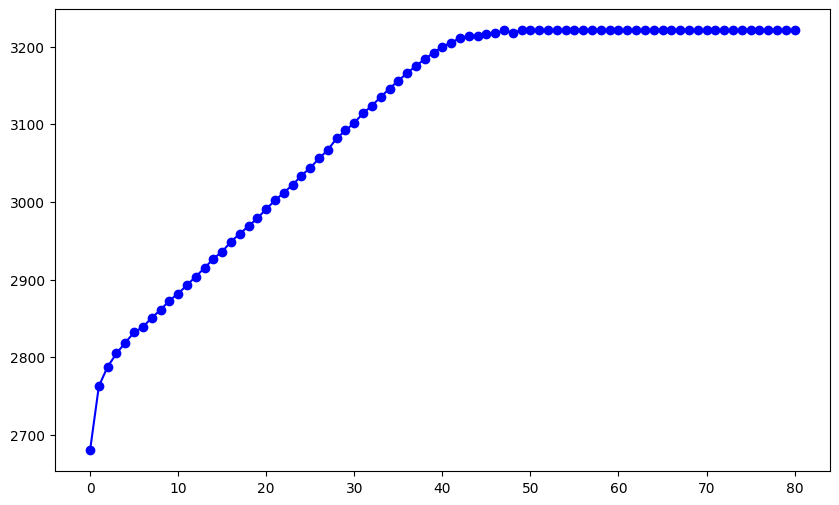

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

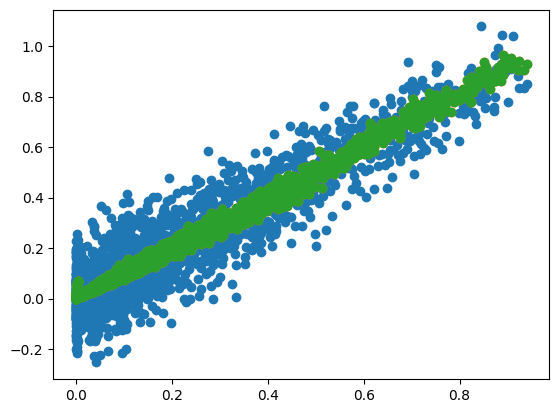

In [58]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [59]:
mycebmf.L
 

array([[1.38071567e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [7.70705789e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.36492312e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.46732542e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.90143859e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.34413669e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.33064389e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.40257347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.05338566e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.36695588e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.20238900e-01, 0.0000